In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
df = pd.read_csv('axis_bank.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,162.000000,163.000000,156.800003,158.960007,147.911835,9727265.0
1,2012-01-03,161.020004,168.380005,160.729996,167.509995,155.867569,10710050.0
2,2012-01-04,168.960007,171.199997,166.380005,169.630005,157.840210,16936750.0
3,2012-01-05,169.800003,175.759995,169.009995,174.130005,162.027466,16901170.0
4,2012-01-06,172.559998,173.199997,167.259995,170.699997,158.835861,12345325.0


In [4]:
df=df.drop(['Date','Adj Close'] , axis =1)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,162.000000,163.000000,156.800003,158.960007,9727265.0
1,161.020004,168.380005,160.729996,167.509995,10710050.0
2,168.960007,171.199997,166.380005,169.630005,16936750.0
3,169.800003,175.759995,169.009995,174.130005,16901170.0
4,172.559998,173.199997,167.259995,170.699997,12345325.0


In [38]:
df.isnull().sum()

Open      6
High      6
Low       6
Close     6
Volume    6
dtype: int64

In [5]:
df= df.fillna(method='ffill')

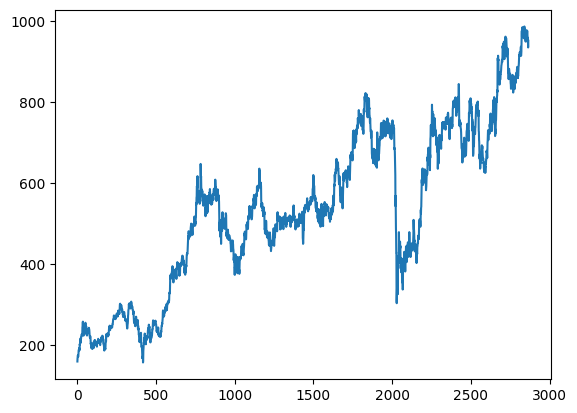

In [8]:
plt.plot(df.Close)

In [14]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [7]:
ma_100= df.Close.rolling(100).mean()
ma_100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2861    912.379000
2862    913.451500
2863    914.309000
2864    915.054999
2865    915.899500
Name: Close, Length: 2866, dtype: float64

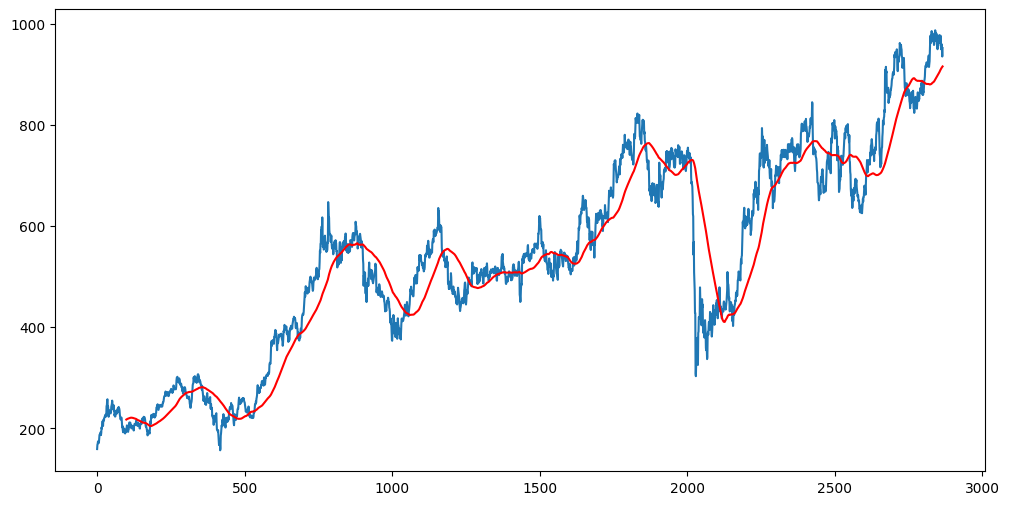

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma_100,'r')

In [9]:
ma_200= df.Close.rolling(200).mean()
ma_200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2861    900.97125
2862    901.84300
2863    902.52575
2864    903.19350
2865    903.95225
Name: Close, Length: 2866, dtype: float64

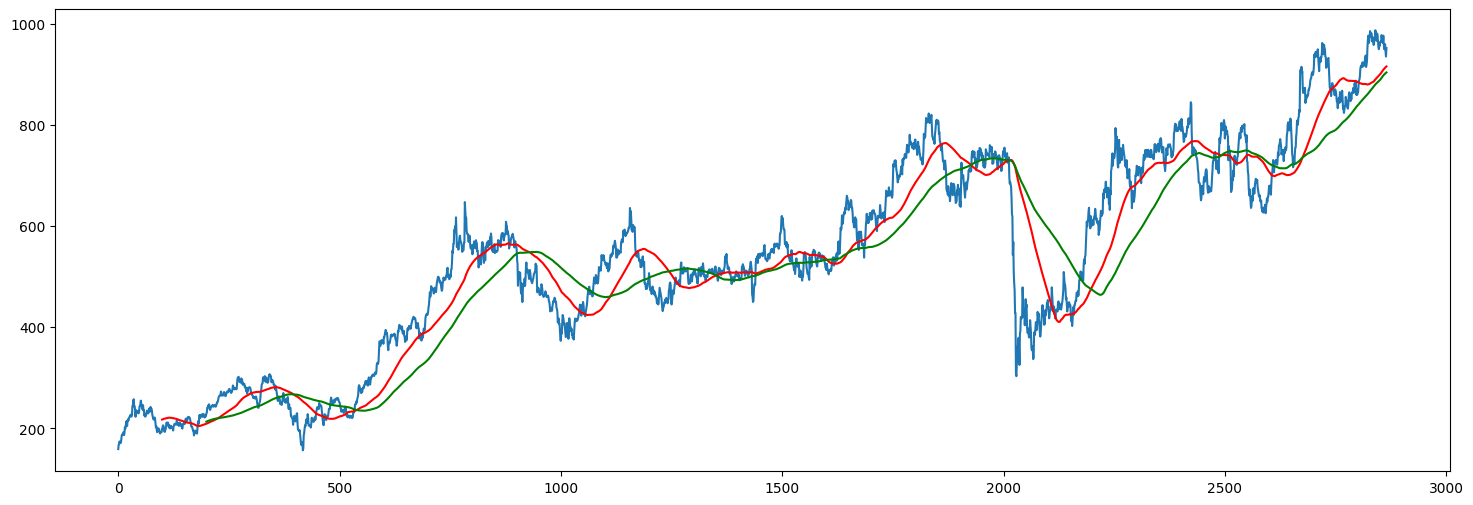

In [10]:
plt.figure(figsize = (18,6))
plt.plot(df.Close)
plt.plot(ma_100,'r')
plt.plot(ma_200,'g')

In [48]:
df.shape

(2866, 5)

In [49]:
# Splitting data (train,test)

In [11]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2006, 1)
(860, 1)


In [ ]:
# preprocessing(scaling down)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00358735],
       [0.01642074],
       [0.01960284],
       ...,
       [0.88742626],
       [0.87046517],
       [0.87331707]])

In [54]:
data_training_array.shape

(2006, 1)

In [14]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

# Convert the lists to NumPy arrays after the loop
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train  # This will display the X_train array

array([[[0.00358735],
        [0.01642074],
        [0.01960284],
        ...,
        [0.05484592],
        [0.05421551],
        [0.06452725]],

       [[0.01642074],
        [0.01960284],
        [0.02635726],
        ...,
        [0.05421551],
        [0.06452725],
        [0.06530777]],

       [[0.01960284],
        [0.02635726],
        [0.02120888],
        ...,
        [0.06452725],
        [0.06530777],
        [0.07401348]],

       ...,

       [[0.72291854],
        [0.78618493],
        [0.85395435],
        ...,
        [0.87736966],
        [0.89065341],
        [0.8986086 ]],

       [[0.78618493],
        [0.85395435],
        [0.82228364],
        ...,
        [0.89065341],
        [0.8986086 ],
        [0.88742626]],

       [[0.85395435],
        [0.82228364],
        [0.80809934],
        ...,
        [0.8986086 ],
        [0.88742626],
        [0.87046517]]])

In [ ]:

# ML model

In [75]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 985.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [15]:
x_train.shape

(1906, 100, 1)

In [16]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu',return_sequences= True,
                  input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

               

model.add(Dense(units=1))
               
               

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [42]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
60/60 [==============================] - 40s 440ms/step - loss: 0.0650
Epoch 2/50
60/60 [==============================] - 26s 425ms/step - loss: 0.0113
Epoch 3/50
60/60 [==============================] - 27s 445ms/step - loss: 0.0091
Epoch 4/50
60/60 [==============================] - 25s 420ms/step - loss: 0.0090
Epoch 5/50
60/60 [==============================] - 28s 472ms/step - loss: 0.0075
Epoch 6/50
60/60 [==============================] - 29s 476ms/step - loss: 0.0077
Epoch 7/50
60/60 [==============================] - 26s 436ms/step - loss: 0.0077
Epoch 8/50
60/60 [==============================] - 27s 453ms/step - loss: 0.0068
Epoch 9/50
60/60 [==============================] - 23s 382ms/step - loss: 0.0062
Epoch 10/50
60/60 [==============================] - 26s 435ms/step - loss: 0.0067
Epoch 11/50
60/60 [==============================] - 26s 428ms/step - loss: 0.0061
Epoch 12/50
60/60 [==============================] - 24s 395ms/step - loss: 0.0064
Epoch 13/50
6

In [64]:
model.save('keras_model.h5')

E:\Arjav_harry\python-me\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model = load_model('keras_model.h5')

In [43]:
past_100_days = data_training.tail(100)

In [44]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_3228\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [45]:
final_df.shape

(960, 1)

In [46]:
input_data  = scaler.fit_transform(final_df)
input_data

array([[0.58636566],
       [0.57255591],
       [0.57978959],
       [0.58081247],
       [0.55801548],
       [0.54946664],
       [0.53375715],
       [0.51622099],
       [0.54113694],
       [0.55991522],
       [0.54040627],
       [0.54004093],
       [0.55582346],
       [0.56539527],
       [0.57029084],
       [0.59498755],
       [0.59389154],
       [0.59856787],
       [0.60163667],
       [0.59118809],
       [0.59250325],
       [0.59469527],
       [0.63612452],
       [0.64920359],
       [0.63305563],
       [0.65051875],
       [0.64218906],
       [0.63553994],
       [0.64898436],
       [0.63071751],
       [0.61720005],
       [0.62918312],
       [0.5963028 ],
       [0.60317115],
       [0.6046325 ],
       [0.61347363],
       [0.64978808],
       [0.65117638],
       [0.63459012],
       [0.62684491],
       [0.65994446],
       [0.65629109],
       [0.657241  ],
       [0.65387983],
       [0.63700129],
       [0.64467336],
       [0.62874473],
       [0.638

In [47]:
x_test = []
y_test= []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [48]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)

(860, 100, 1)


In [49]:
# Making Predictions

y_predicted = model.predict(x_test)
y_predicted.shape

27/27 [==============================] - 4s 136ms/step


(860, 1)

In [50]:
x_test

array([[[0.58636566],
        [0.57255591],
        [0.57978959],
        ...,
        [0.64978808],
        [0.63327487],
        [0.63605147]],

       [[0.57255591],
        [0.57978959],
        [0.58081247],
        ...,
        [0.63327487],
        [0.63605147],
        [0.62911007]],

       [[0.57978959],
        [0.58081247],
        [0.55801548],
        ...,
        [0.63605147],
        [0.62911007],
        [0.63992398]],

       ...,

       [[0.81302059],
        [0.81513956],
        [0.82514976],
        ...,
        [0.94519948],
        [0.95097181],
        [0.9597399 ]],

       [[0.81513956],
        [0.82514976],
        [0.80191439],
        ...,
        [0.95097181],
        [0.9597399 ],
        [0.93833113]],

       [[0.82514976],
        [0.80191439],
        [0.77334498],
        ...,
        [0.9597399 ],
        [0.93833113],
        [0.92415604]]])

In [51]:
y_test

array([0.62911007, 0.63992398, 0.64467336, 0.617127  , 0.62194943,
       0.62289934, 0.63232496, 0.57599004, 0.55684642, 0.56115742,
       0.55392373, 0.54763995, 0.51804767, 0.46821567, 0.462078  ,
       0.3508695 , 0.38820691, 0.30023383, 0.27064154, 0.24886748,
       0.18281456, 0.18266842, 0.00803741, 0.        , 0.03456086,
       0.05589654, 0.08271227, 0.09498758, 0.1108432 , 0.08110478,
       0.03258807, 0.12523748, 0.12889085, 0.17097764, 0.16922405,
       0.16681279, 0.17448486, 0.25668565, 0.2232939 , 0.17170831,
       0.18705246, 0.18544497, 0.14730384, 0.18142626, 0.22256322,
       0.19867019, 0.20714598, 0.14562325, 0.12545668, 0.12523748,
       0.13765894, 0.1153003 , 0.11164693, 0.12231479, 0.16199036,
       0.14438114, 0.12479905, 0.08132397, 0.07504019, 0.08673097,
       0.07898585, 0.04939357, 0.05575039, 0.12253398, 0.12830632,
       0.11953824, 0.13707441, 0.15629111, 0.15548735, 0.13327489,
       0.14927662, 0.18573725, 0.17083149, 0.1816455 , 0.16118

In [52]:
y_predicted

array([[0.6104834 ],
       [0.6133691 ],
       [0.6151495 ],
       [0.61608565],
       [0.6159501 ],
       [0.6147224 ],
       [0.6125842 ],
       [0.61000633],
       [0.6064483 ],
       [0.6013075 ],
       [0.5945692 ],
       [0.5865494 ],
       [0.57774544],
       [0.5685217 ],
       [0.5591779 ],
       [0.54989374],
       [0.5403225 ],
       [0.5288558 ],
       [0.5139055 ],
       [0.49565285],
       [0.47514713],
       [0.45426476],
       [0.4339105 ],
       [0.41416845],
       [0.3914232 ],
       [0.36049348],
       [0.32115176],
       [0.2774333 ],
       [0.23519853],
       [0.19942015],
       [0.17182209],
       [0.15154722],
       [0.13794836],
       [0.13016348],
       [0.12746686],
       [0.12953754],
       [0.135968  ],
       [0.14578488],
       [0.15832004],
       [0.17227575],
       [0.18659472],
       [0.20067067],
       [0.21389651],
       [0.22564422],
       [0.23546046],
       [0.24291879],
       [0.2477365 ],
       [0.249

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [59]:
mae = mean_absolute_error(y_test, y_predicted)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 33.202656590196


In [60]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1991.780973088999


In [61]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 44.62937343374875


In [63]:
r2 = r2_score(y_test, y_predicted)
print("R-squared (R2):", r2)


R-squared (R2): 0.9238760959255923


In [27]:
scaler.scale_

array([0.00146135])

In [53]:
scale_factor = 1/0.00146135
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

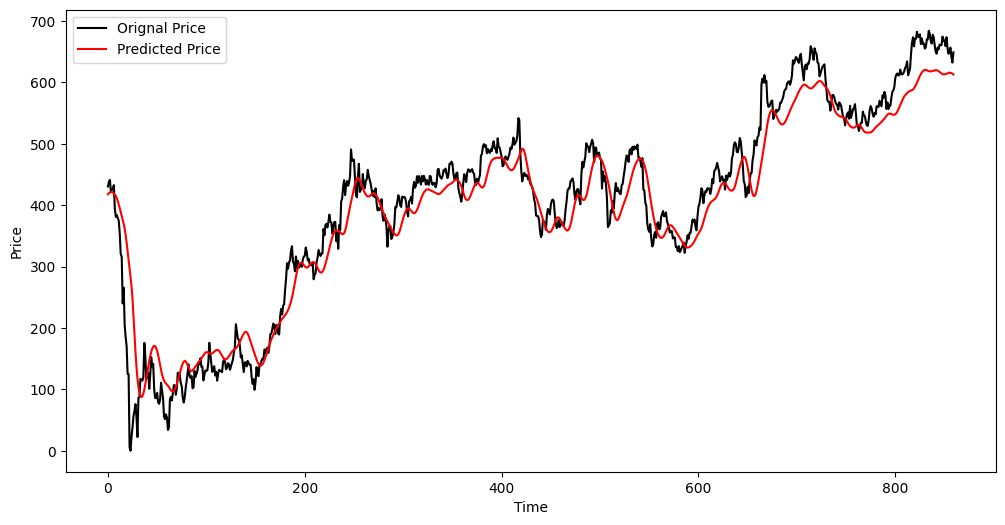

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'black',label = 'Orignal Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show
